In [2]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import linalg

In [3]:
data = pd.read_csv('diamonds.csv')
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [4]:
features = np.array(data[['carat']], dtype=float)
labels = np.array(data['price'],dtype=float)
print(features.shape)
print(labels.shape)

(53940, 1)
(53940,)


# Dataset

This classic dataset contains the prices and other attributes of almost 54,000 diamonds

Content

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# Scaling

In [5]:

def scaling(dataset):
    # масштабуємо признаки
    dataset = np.array(dataset, dtype=float)
    dataset = (dataset[:,] - dataset[:,].mean(axis=0)) / dataset[:,].std(axis = 0)
    
    return dataset
        

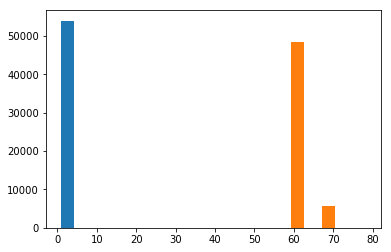

[[-1.19816781 -0.17409151]
 [-1.24036129 -1.36073849]
 [-1.19816781 -3.38501862]
 ..., 
 [-0.20662095  0.73334442]
 [ 0.13092691 -0.52310533]
 [-0.10113725  0.31452784]]


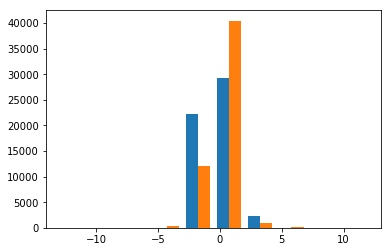

In [6]:
features_s = np.array(data[['carat','depth']], dtype=float)

# розсіювання даних до масштабування
plt.hist(features_s)
plt.show()

# масштабування
scal_features = scaling(features_s)

print(scal_features)

# розсіювання даних після масштабування
plt.hist(scal_features)
plt.show()

порівняння з отриманим результатом за допомогою sklearn

In [7]:
from sklearn.preprocessing import scale

dataset = scale( features_s, axis=0, with_mean=True, with_std=True, copy=True )
print(dataset)

[[-1.19816781 -0.17409151]
 [-1.24036129 -1.36073849]
 [-1.19816781 -3.38501862]
 ..., 
 [-0.20662095  0.73334442]
 [ 0.13092691 -0.52310533]
 [-0.10113725  0.31452784]]


# Linear regression


# analytical decision

In [8]:
def analytical_linear_regr(X, y):
    k = 1
    X = np.array(X)
    y = np.array(y)
    y = y.reshape((len(y),-1))
    return ((linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)

In [9]:
features_s = np.array(data[['carat','depth']], dtype=float)
labels_s = np.array(data['price'],dtype=float)

# without scaling
w = analytical_linear_regr(features_s, labels_s)
print(w)

[[ 7767.28549987]
 [  -36.71617751]]


In [10]:
# with scaling
w = analytical_linear_regr(scaling(features_s), labels_s)
print(w)

[[ 3680.7298698 ]
 [ -146.36286183]]


# solution using gradient descent

In [11]:
def linear_regression(features, labels, num_iterations=10000):
 
    b = np.ones((len(features[:,]),1))
    features = np.array(features, dtype=float)
    # додаємо до матриці признаків константний признак, який відповідає за вільний член
    #features = np.column_stack((features,b))
    
    # створюємо матрицю стовбець    
    labels = np.array(labels, dtype= float).reshape((len(labels),1)) 
    # ініціалізація початкових наближень вектора коефіцієнтів
    init_weights = np.zeros((len(features[0]),1))
    
    # навчання моделі
    print(
        'Start learning at init_weights = {0}, error = {1}'.format(
            init_weights,
            compute_error(init_weights,features, labels)
        )
    )
    
    weights = gradient_descent(init_weights, features, labels, num_iterations)
    
    print(
        'End learning at weights = {0}, error = {1}'.format(
            weights,
            compute_error(weights, features, labels)
        )
    )
    
    return weights

In [12]:
def compute_error(weights, features, labels):
    '''
        MSE = Computes Error = 1/N * sum((y - a(x)^2)
    '''
    MSE = 0
    MSE = ( (features.dot(weights) - labels)**2 ).sum()
    return MSE / len(labels)

In [13]:
def gradient_descent(start_weights, features, labels, num_iterations):
    '''
        Performs gradient step num_iterations times
        in order to find optimal a, b values
    '''
    weights = start_weights
    N = len(labels[:,])
    for i in range(num_iterations):
        learning_rate = 1/(i+1)
        gradient_weights =  (2*(features.T).dot( features.dot(weights) - labels )) / N
        weights = weights - learning_rate * ( gradient_weights)
        
    return weights

навчаємо модель з двома признаками і одним вільним членом

In [14]:
features = np.array(data[['carat','depth']], dtype=float)
labels = np.array(data['price'],dtype=float)

w = linear_regression(scaling(features), labels)

Start learning at init_weights = [[ 0.]
 [ 0.]], error = 31382248.015257694
End learning at weights = [[ 3680.72987096]
 [ -146.3628642 ]], error = 17843463.680460162


навчаємо модель з одним признаком і одним вільним членом

In [15]:
features = np.array(data[['carat']], dtype=float)
labels = np.array(data['price'],dtype=float)

w = linear_regression(scaling(features), labels)

Start learning at init_weights = [[ 0.]], error = 31382248.015257694
End learning at weights = [[ 3676.59887839]], error = 17864868.702693507


# Візуалізація отриманих результатів для моделі з одним признаком

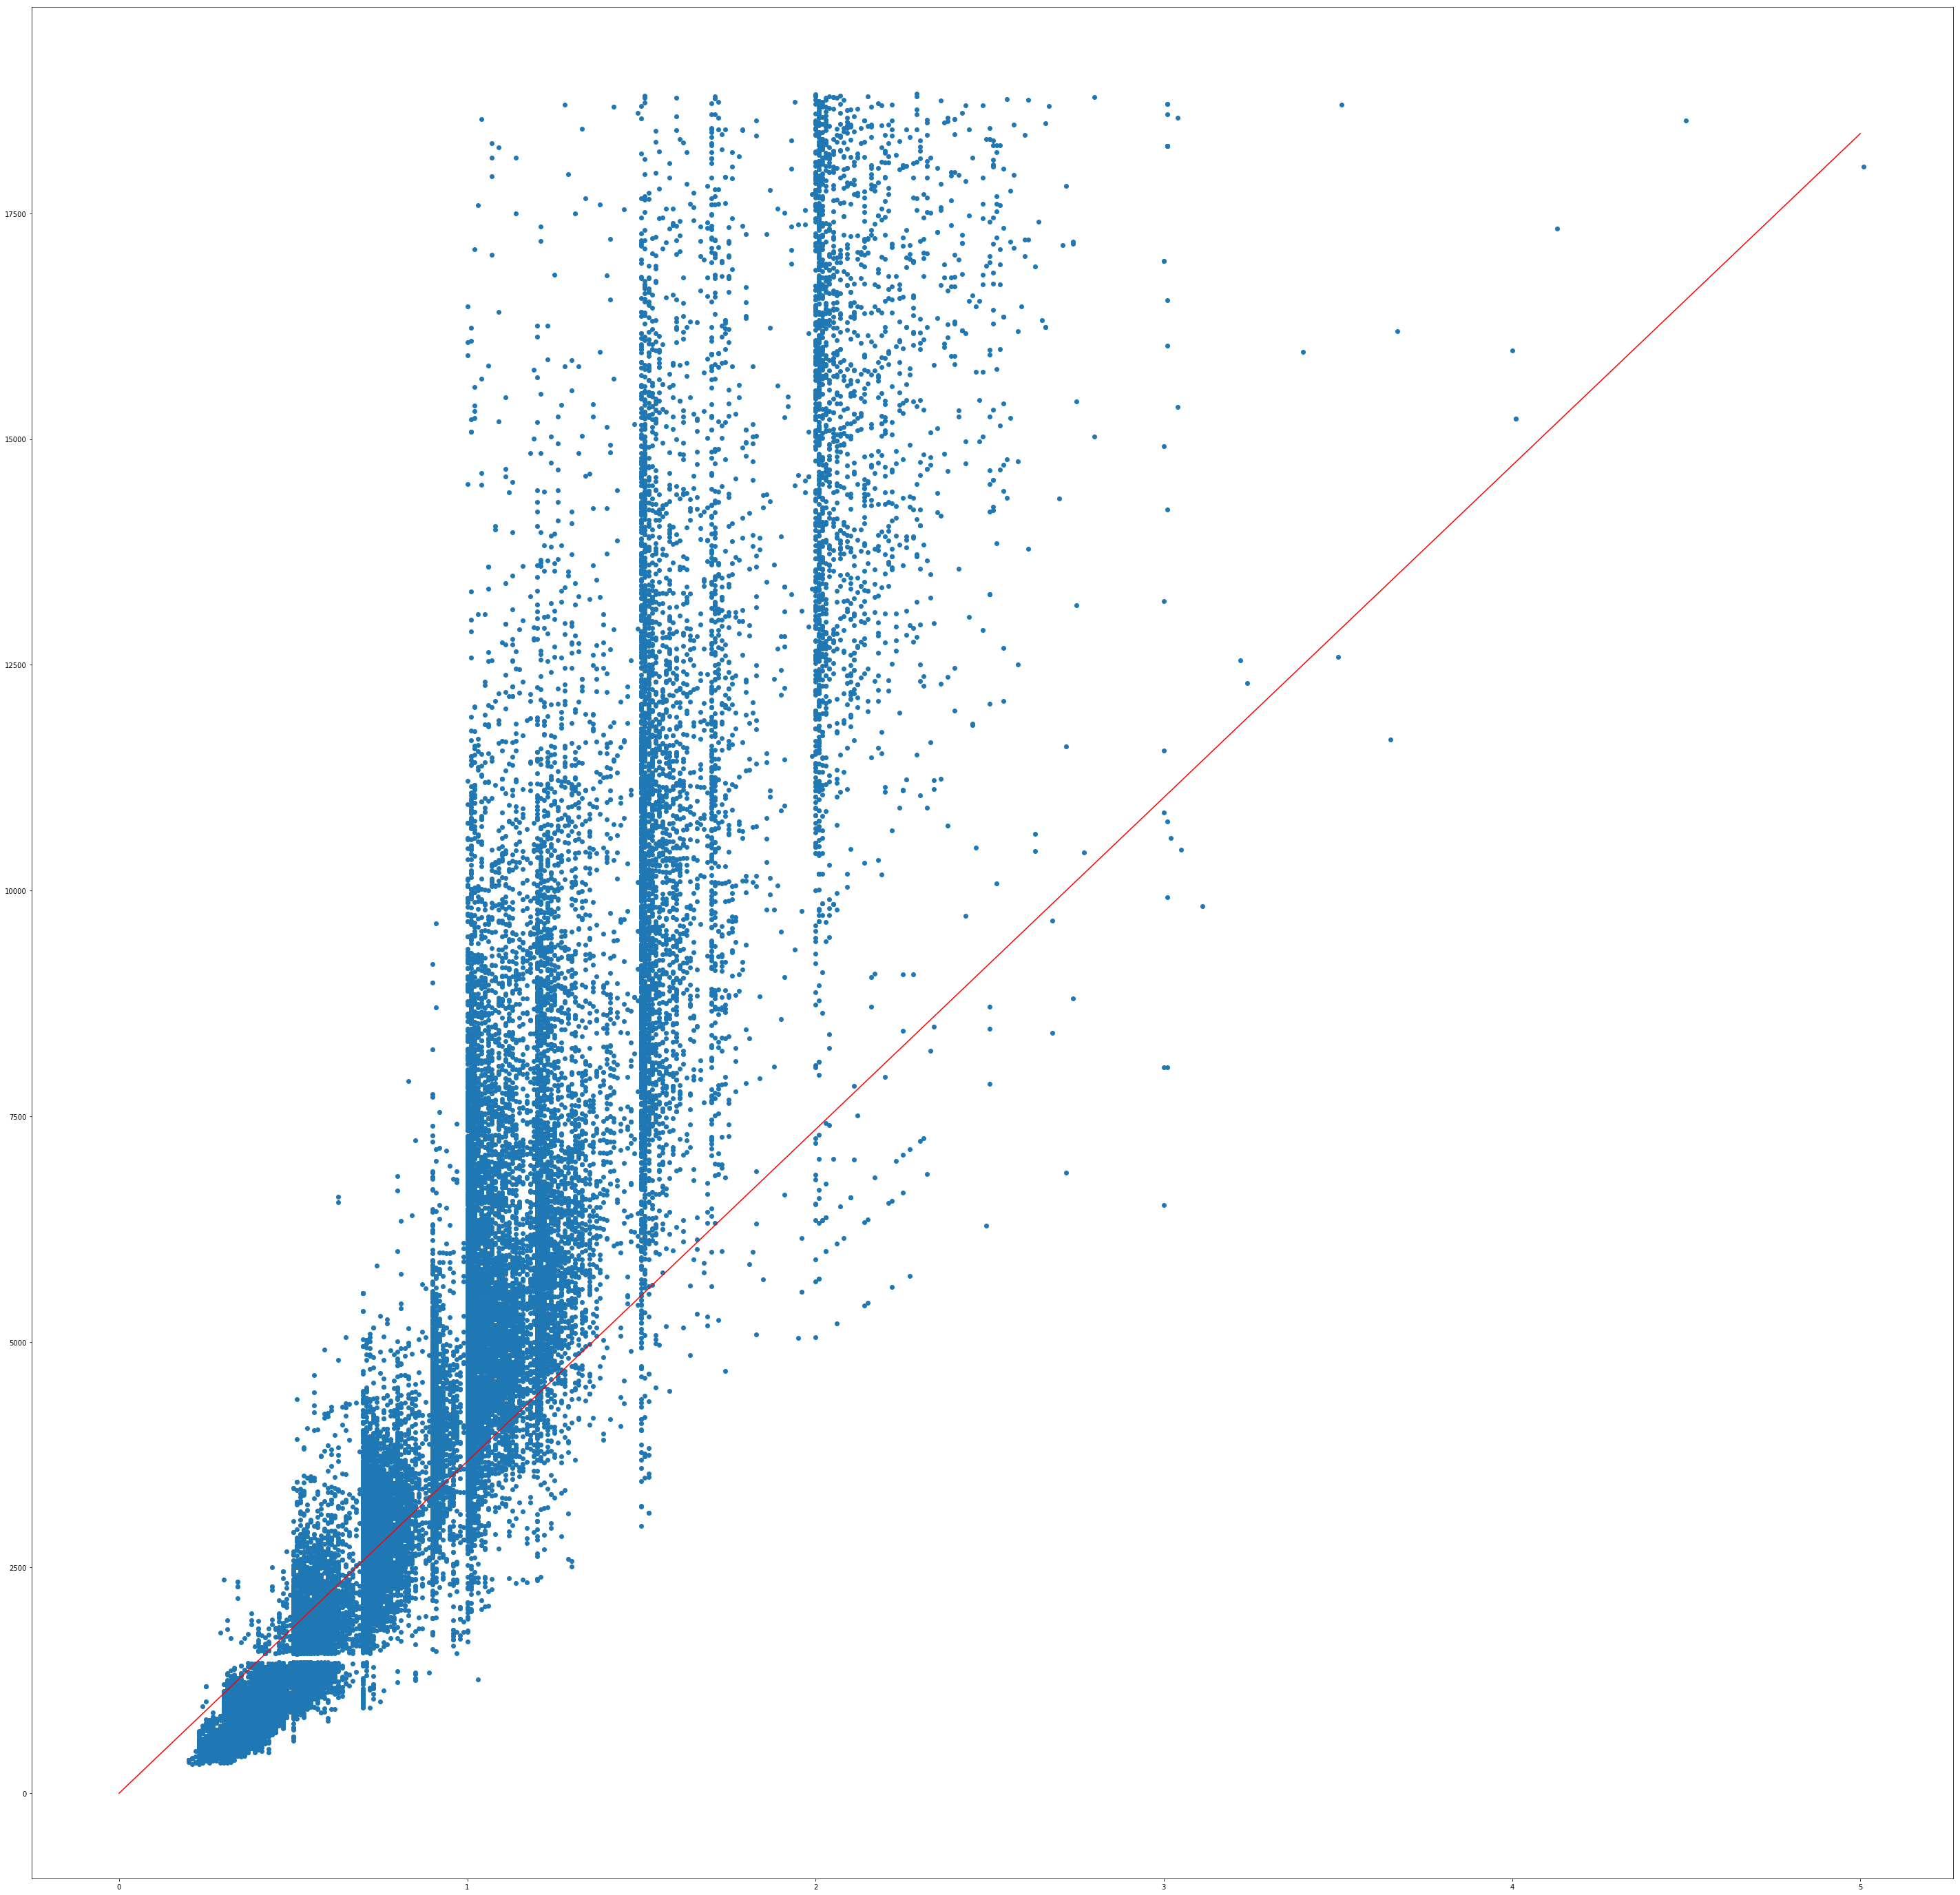

In [16]:
plt.figure(figsize=(50,50))
carat_exam = np.linspace(0,5,300)

plt.plot(carat_exam, (carat_exam * w[0]), color='red')
plt.scatter(features,labels)
plt.show()

# Порівнянння із sklearn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
features = np.array(data[['carat','depth']], dtype=float)
labels = np.array(data['price'],dtype=float)

w = linear_regression(scaling(features), labels)

Start learning at init_weights = [[ 0.]
 [ 0.]], error = 31382248.015257694
End learning at weights = [[ 3680.72987096]
 [ -146.3628642 ]], error = 17843463.680460162


In [19]:
X = np.array(data[['carat','depth']], dtype=float)
Y = np.array(data['price'],dtype=float)

lr = LinearRegression(normalize=True)
lr.fit(X,Y)
print (lr.coef_)

[ 7765.14066377  -102.16532216]
